# TicTacTrip data crunching

## Question 1

**basic imports**

In [1]:
import numpy as np
import pandas as pd

**load the dataset**

In [2]:
cities = pd.read_csv('data/cities.csv')
providers = pd.read_csv('data/providers.csv')
stations = pd.read_csv('data/stations.csv')
ticket_data = pd.read_csv('data/ticket_data.csv')

In [3]:
dataset = {'cities': cities, 'providers': providers, 'stations': stations, 'ticket_data': ticket_data}

**Price statistics**

In [4]:
print('_________________________________________________________')
print('    Price statistics')
print('_________________________________________________________')
print('    number of NAN values in price_in_cents =', ticket_data['price_in_cents'].isna().sum())
print('    number of trips =', len(ticket_data))
print('    min price =', round(ticket_data['price_in_cents'].min()/100, 2), '€')
print('    max price =', round(ticket_data['price_in_cents'].max()/100, 2), '€')
print('    median price =', round(ticket_data['price_in_cents'].median()/100, 2), '€')
print('    mean price =', round(ticket_data['price_in_cents'].mean()/100, 2), '€')
print('    most trips have a price =', round(ticket_data['price_in_cents'].value_counts().idxmax()/100, 2), '€')
print('_________________________________________________________')

_________________________________________________________
    Price statistics
_________________________________________________________
    number of NAN values in price_in_cents = 0
    number of trips = 74168
    min price = 3.0 €
    max price = 385.5 €
    median price = 33.5 €
    mean price = 43.83 €
    most trips have a price = 17.0 €
_________________________________________________________


In [5]:
import matplotlib.pyplot as plt
ticket_data['price'] = round(ticket_data['price_in_cents'] / 100, 2)
ticket_data['bin'] = pd.cut(ticket_data['price'], bins=5)
ticket_data.groupby('bin')['price'].count().plot(kind='bar', width=0.98)
plt.xlabel('Price €')
plt.ylabel('Number of trips')
plt.show()

<Figure size 640x480 with 1 Axes>

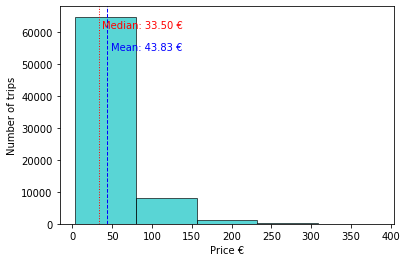

In [6]:
import matplotlib.pyplot as plt
ticket_data['price'] = round(ticket_data['price_in_cents'] / 100, 2)
plt.hist(ticket_data['price'], bins=5, color='c', edgecolor='k', alpha=0.65)
plt.xlabel('Price €')
plt.ylabel('Number of trips')
# axe of mean
min_ylim, max_ylim = plt.ylim()
plt.text(ticket_data['price'].mean()*1.1, max_ylim*0.8, 'Mean: {:.2f} €'.format(ticket_data['price'].mean()), color='b')
plt.axvline(ticket_data['price'].mean(), color='b', linestyle='dashed', linewidth=1)
# axe of median
min_ylim, max_ylim = plt.ylim()
plt.text(ticket_data['price'].median()*1.1, max_ylim*0.9, 'Median: {:.2f} €'.format(ticket_data['price'].median()), color='r')
plt.axvline(ticket_data['price'].median(), color='r', linestyle='dotted', linewidth=1)
plt.show()

**Duration statistics**

first we need to get the duration from the ticket information

In [7]:
# add duration column in hours
fmt = '%Y-%m-%d %H:%M:%S+%f'
ticket_data['departure_ts'] = pd.to_datetime(ticket_data['departure_ts'], format=fmt)
ticket_data['arrival_ts'] = pd.to_datetime(ticket_data['arrival_ts'], format=fmt)
ticket_data['duration'] = ticket_data['arrival_ts'] - ticket_data['departure_ts']
ticket_data['duration'] = round(ticket_data['duration'].dt.seconds / 3600, 2)

In [8]:
print('_________________________________________________________')
print('    Duration statistics')
print('_________________________________________________________')
print('    number of NAN values in departure_ts =', ticket_data['departure_ts'].isna().sum())
print('    number of NAN values in arrival_ts =', ticket_data['arrival_ts'].isna().sum())
print('    min duration =', round(ticket_data['duration'].min(), 2), 'hours')
print('    max duration =', round(ticket_data['duration'].max(), 2), 'hours')
print('    median duration =', round(ticket_data['duration'].median(), 2), 'hours')
print('    mean duration =', round(ticket_data['duration'].mean(), 2), 'hours')
print('    most trips have a duration =', round(ticket_data['duration'].value_counts().idxmax(), 2), 'hours')
print('_________________________________________________________')

_________________________________________________________
    Duration statistics
_________________________________________________________
    number of NAN values in departure_ts = 0
    number of NAN values in arrival_ts = 0
    min duration = 0.0 hours
    max duration = 23.97 hours
    median duration = 4.82 hours
    mean duration = 6.02 hours
    most trips have a duration = 2.5 hours
_________________________________________________________


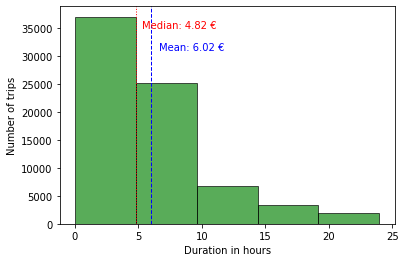

In [9]:
plt.hist(ticket_data['duration'], bins=5, color='g', edgecolor='k', alpha=0.65)
plt.xlabel('Duration in hours')
plt.ylabel('Number of trips')
# axe of mean
min_ylim, max_ylim = plt.ylim()
plt.text(ticket_data['duration'].mean()*1.1, max_ylim*0.8, 'Mean: {:.2f} €'.format(ticket_data['duration'].mean()), color='b')
plt.axvline(ticket_data['duration'].mean(), color='b', linestyle='dashed', linewidth=1)
# axe of median
min_ylim, max_ylim = plt.ylim()
plt.text(ticket_data['duration'].median()*1.1, max_ylim*0.9, 'Median: {:.2f} €'.format(ticket_data['duration'].median()), color='r')
plt.axvline(ticket_data['duration'].median(), color='r', linestyle='dotted', linewidth=1)
plt.show()

## Question 2

First we need to cd to our current folder

In [ ]:
import os
os.getcwd()
os.chdir("D:/HAKIM/M1 IA S2/Stage/TicTacTrip/code/")
os.getcwd()
! set PYTHONPATH=%PYTHONPATH%;D:/HAKIM/M1 IA S2/Stage/TicTacTrip/code/

### here we get the distances
- the distance is the sum of the distances between all the stations (middle stations) in a ticket.  
- if a ticket has no station, we use the city to calculate the distance.
- the calculated distance is then saved into a csv file

In [14]:
from modules.Geo import Geo
from modules.Manager import Manager
# this is to load the new generated file
ticket_data = pd.read_csv('data/ticket_data_transport_type.csv')
# ticket_data['distance'] = round(ticket_data['distance'], 4)
# ticket_data['transport_types'] = ticket_data.apply(lambda ticket: Manager.transportTypesOfTicketObject(ticket, providers), axis=1)
# cp = ticket_data['transport_types']
# bus = pd.DataFrame({'bus': ticket_data['transport_types'].apply(lambda e: 1 if 'bus' in e else 0)})
# car = pd.DataFrame({'car': ticket_data['transport_types'].apply(lambda e: 1 if 'car' in e else 0)})
# train = pd.DataFrame({'train': ticket_data['transport_types'].apply(lambda e: 1 if 'train' in e else 0)})
# carpooling = pd.DataFrame({'carpooling': ticket_data['transport_types'].apply(lambda e: 1 if 'carpooling' in e else 0)})
# res = bus.join(car).join(train).join(carpooling)
# ticket_data = ticket_data.join(res)
# get distances
# ticket_data['distance'] = ticket_data.apply(lambda ticket: Geo.distanceOfTicketObject(ticket, stations, cities), axis=1)
print(ticket_data)
# del ticket_data['transport_types']
# ticket_data.to_csv('data/ticket_data_transport_type.csv', encoding='utf-8', index=False)
# print(Manager.transportTypesOfTicket(6795025, ticket_data, providers))
# print(Geo.getLatLongStation(2, stations))
# print(Geo.distanceOfTicket(6795027, ticket_data, stations), 'km')

            id  company  o_station  d_station         departure_ts  \
0      6795025     8385        NaN        NaN  2017-10-13 14:00:00   
1      6795026        9       63.0     1044.0  2017-10-13 13:05:00   
2      6795027     8377     5905.0     6495.0  2017-10-13 13:27:00   
3      6795028     8377     5905.0     6495.0  2017-10-13 13:27:00   
4      6795029     8381     5905.0     6495.0  2017-10-13 21:46:00   
...        ...      ...        ...        ...                  ...   
74163  6869182       13      279.0    10729.0  2017-10-27 02:30:00   
74164  6869185        9      279.0      304.0  2017-10-27 07:00:00   
74165  6869187     8371    10642.0      304.0  2017-10-27 08:30:00   
74166  6869189       13      279.0      304.0  2017-10-27 13:25:00   
74167  6869191     8371    10642.0    10729.0  2017-10-27 14:45:00   

                arrival_ts  price_in_cents                   search_ts  \
0      2017-10-13 20:10:00            4550  2017-10-01 00:13:31.327+00   
1      2017

### For the price per transport type per distance

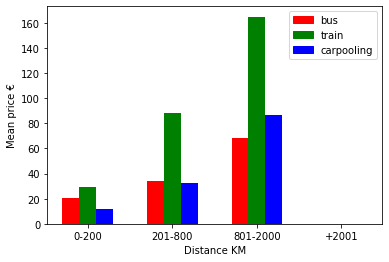

In [26]:
bins = [0, 200, 800, 2000, float('inf')]
labels = ['0-200', '201-800', '801-2000', '+2001']
ticket_data['distance_interval'] = pd.cut(ticket_data['distance'], bins, labels=labels, include_lowest=True)
bus = ticket_data[(ticket_data['bus']==1)]
mBus = bus.groupby('distance_interval')['price'].mean()
mBus[3] = 0 if pd.isna(mBus[3]) else mBus[3]
train = ticket_data[(ticket_data['train']==1)]
mTrain = train.groupby('distance_interval')['price'].mean()
mTrain[3] = 0 if pd.isna(mTrain[3]) else mTrain[3]
carpooling = ticket_data[(ticket_data['carpooling']==1)]
mCarpooling = carpooling.groupby('distance_interval')['price'].mean()
mCarpooling[3] = 0 if pd.isna(mCarpooling[3]) else mCarpooling[3]
ax = plt.subplot(111)
barPositions = [1, 2, 3, 4]
rBus = ax.bar(np.add((np.array(barPositions)), -0.2), mBus, width=0.2, color='r', align='center')
rTrain = ax.bar(np.add((np.array(barPositions)), 0), mTrain, width=0.2, color='g', align='center')
rCarpooling = ax.bar(np.add((np.array(barPositions)), +0.2), mCarpooling, width=0.2, color='b', align='center')
# labels and legend
ax.set_xticks(barPositions)
ax.set_xticklabels(labels)
colors = {'bus':'red', 'train':'green', 'carpooling':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel('Distance KM')
plt.ylabel('Mean price €')
plt.show()

We can notice from the graph that :  
- The trains are more expensive than than buses and carpooling

### For the duration per transport type per distance

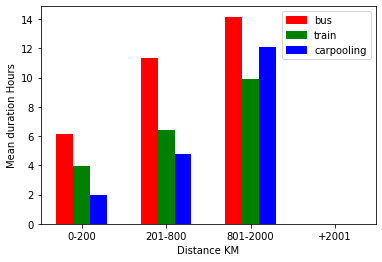

In [25]:
bins = [0, 200, 800, 2000, float('inf')]
labels = ['0-200', '201-800', '801-2000', '+2001']
ticket_data['distance_interval'] = pd.cut(ticket_data['distance'], bins, labels=labels, include_lowest=True)
bus = ticket_data[(ticket_data['bus']==1)]
mBus = bus.groupby('distance_interval')['duration'].mean()
mBus[3] = 0 if pd.isna(mBus[3]) else mBus[3]
train = ticket_data[(ticket_data['train']==1)]
mTrain = train.groupby('distance_interval')['duration'].mean()
mTrain[3] = 0 if pd.isna(mTrain[3]) else mTrain[3]
carpooling = ticket_data[(ticket_data['carpooling']==1)]
mCarpooling = carpooling.groupby('distance_interval')['duration'].mean()
mCarpooling[3] = 0 if pd.isna(mCarpooling[3]) else mCarpooling[3]
ax = plt.subplot(111)
barPositions = [1, 2, 3, 4]
rBus = ax.bar(np.add((np.array(barPositions)), -0.2), mBus, width=0.2, color='r', align='center')
rTrain = ax.bar(np.add((np.array(barPositions)), 0), mTrain, width=0.2, color='g', align='center')
rCarpooling = ax.bar(np.add((np.array(barPositions)), +0.2), mCarpooling, width=0.2, color='b', align='center')
# labels and legend
ax.set_xticks(barPositions)
ax.set_xticklabels(labels)
colors = {'bus':'red', 'train':'green', 'carpooling':'blue'}         
labels = list(colors.keys())
handles = [plt.Rectangle((0,0),1,1, color=colors[label]) for label in labels]
plt.legend(handles, labels)
plt.xlabel('Distance KM')
plt.ylabel('Mean duration Hours')
plt.show()

We can notice from the graph that :  
- The bus takes more time compared to the train and carpooling